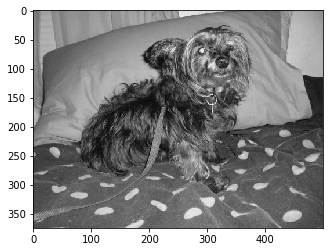

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D
import pickle

datadir = "C:/Users/rishabh/Downloads/kagglecatsanddogs_3367a/PetImages/Dog"
path=os.path.join(datadir)
for img in os.listdir(path):
    img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
    plt.imshow(img_array, cmap="gray")
    plt.show
    break
    

In [39]:
print(img_array.shape)

(375, 500)


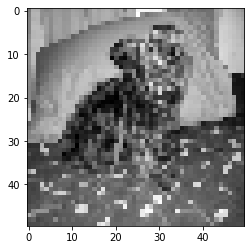

In [42]:
img_size=50
new_array=cv2.resize(img_array, ( img_size,img_size))
plt.imshow(new_array,cmap='gray')
plt.show()

In [5]:
training_data=[]
def create_training_data():
    path=os.path.join(datadir)
    for img in os.listdir(path):
        try:
            img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
            new_array=cv2.resize(img_array, ( img_size,img_size))
            training_data.append([new_array,1])
        except Exception as e:
            pass

create_training_data()


In [6]:
print(len(training_data))

12470


In [7]:
import random
random.shuffle(training_data)

In [8]:
for sample in training_data[:10]:
    print(sample[1])

1
1
1
1
1
1
1
1
1
1


In [9]:
X1=[]
y=[]


In [10]:
for features,label in training_data:
    X1.append(features)
    y.append(label)
print(len(X1))
X1=np.array(X1).reshape(-1,img_size,img_size,1)  

12470


In [11]:
import pickle

pickle_out = open("X1.pickle","wb")
pickle.dump(X1,pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y,pickle_out)
pickle_out.close()


In [12]:
pickle_in=open("X1.pickle","rb")
X1=pickle.load(pickle_in)

In [13]:
X1[1]

array([[[ 45],
        [ 49],
        [ 53],
        ...,
        [ 78],
        [ 69],
        [ 81]],

       [[ 49],
        [ 51],
        [ 48],
        ...,
        [ 79],
        [ 79],
        [ 83]],

       [[ 48],
        [ 46],
        [ 48],
        ...,
        [ 77],
        [ 76],
        [ 71]],

       ...,

       [[254],
        [255],
        [254],
        ...,
        [ 55],
        [ 67],
        [ 59]],

       [[255],
        [255],
        [255],
        ...,
        [ 63],
        [ 68],
        [ 66]],

       [[255],
        [255],
        [255],
        ...,
        [ 72],
        [ 65],
        [ 66]]], dtype=uint8)

In [15]:
X1=X1/255
model=Sequential()

model.add(Conv2D(64,(3,3),input_shape = X1.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Flatten())
model.add(Dense(64))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss="binary_crossentropy",
             optimizer="adam",
             metrics=["accuracy"])
model.fit(X1,y,batch_size=32,epochs=3,validation_split=0.1)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 11223 samples, validate on 1247 samples
Epoch 1/3
11223/11223 [==============================] - 22s 2ms/sample - loss: 0.0020 - acc: 0.9998 - val_loss: 5.7841e-19 - val_acc: 1.0000
Epoch 2/3
11223/11223 [==============================] - 28s 2ms/sample - loss: 2.4907e-17 - acc: 1.0000 - val_loss: 5.7841e-19 - val_acc: 1.0000
Epoch 3/3
11223/11223 [==============================] - 30s 3ms/sample - loss: 2.4907e-17 - acc: 1.0000 - val_loss: 5.7841e-19 - val_acc: 1.0000


In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 64)        640       
_________________________________________________________________
activation (Activation)      (None, 48, 48, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 22, 22, 64)        36928     
_________________________________________________________________
activation_1 (Activation)    (None, 22, 22, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 7744)              0

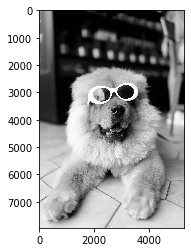

In [47]:
datadir = "D:\pet"
categories=["dog","cat"]
for categ in categories:
    path=os.path.join(datadir,categ)
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap="gray")
        plt.show
        break
    break

In [48]:
img_size


50

In [49]:
test_data=[]
class_num=0
def create_test_data():
    for categ in categories:
        if(categ=='dog'):
            class_num=1
        else:
            class_num=0
        path=os.path.join(datadir,categ)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                new_array=cv2.resize(img_array, ( img_size,img_size))
                test_data.append([new_array,class_num])
            except Exception as e:
                pass

create_test_data()

In [50]:
print(len(test_data))

36


In [51]:
import random
random.shuffle(test_data)

In [52]:
for sample in test_data[:10]:
    print(sample[1])

1
1
1
1
0
0
1
1
0
1


In [53]:
X_test=[]
Y_test=[]

In [55]:
for features,label in test_data:
    X_test.append(features)
    Y_test.append(label)
    
X_test=np.array(X_test).reshape(-1, img_size,img_size,1)

In [56]:
import pickle

pickle_out = open("X_test.pickle","wb")
pickle.dump(X_test,pickle_out)
pickle_out.close()

pickle_out = open("Y_test.pickle","wb")
pickle.dump(Y_test,pickle_out)
pickle_out.close()


In [57]:
pickle_in=open("X_test.pickle","rb")
X_test=pickle.load(pickle_in)

In [58]:
X_test[1]

array([[[ 55],
        [ 78],
        [ 72],
        ...,
        [178],
        [174],
        [176]],

       [[ 48],
        [ 66],
        [216],
        ...,
        [185],
        [177],
        [179]],

       [[126],
        [175],
        [122],
        ...,
        [188],
        [178],
        [175]],

       ...,

       [[215],
        [225],
        [228],
        ...,
        [103],
        [ 98],
        [123]],

       [[197],
        [169],
        [207],
        ...,
        [142],
        [157],
        [158]],

       [[192],
        [207],
        [179],
        ...,
        [172],
        [114],
        [139]]], dtype=uint8)

In [59]:
### START CODE HERE ### (1 line)
preds = model.evaluate(x = X_test, y = Y_test)
### END CODE HERE ###
print()
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

72/72 [==============================] - 0s 2ms/sample - loss: 11667.7841 - acc: 0.5556

Loss = 11667.784071180555
Test Accuracy = 0.5555556
